In [1]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Point
import geopandas 
from geopandas import GeoDataFrame

In [2]:
business = pd.read_json("yelp_academic_dataset_business.json", lines=True)

In [3]:
business.sample()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
819,uAoUAlnbJw_P9x2RXpbLuw,Big Kahuna,"5207 Brodie Ln, Ste 115",Sunset Valley,TX,78745,30.230981,-97.817636,4.5,77,0,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...","Poke, Food, Restaurants, Hawaiian, Burgers, As...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


In [12]:
%%time
chunksize = 10 ** 5
data = []
for chunk in pd.read_json("yelp_academic_dataset_review.json", lines=True, chunksize=chunksize):
    data.append(chunk)

CPU times: user 1min 39s, sys: 41.1 s, total: 2min 20s
Wall time: 2min 35s


In [5]:
#businesses with coffee in the 1st category
coffee_bus = business[business['categories'].str.find('Coffee')==0].reset_index( drop = True)
coffee_bus.to_csv('coffee_businesses.csv',index=False , encoding='utf-8')

In [6]:
coffee_bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   2061 non-null   object 
 1   name          2061 non-null   object 
 2   address       2061 non-null   object 
 3   city          2061 non-null   object 
 4   state         2061 non-null   object 
 5   postal_code   2061 non-null   object 
 6   latitude      2061 non-null   float64
 7   longitude     2061 non-null   float64
 8   stars         2061 non-null   float64
 9   review_count  2061 non-null   int64  
 10  is_open       2061 non-null   int64  
 11  attributes    2044 non-null   object 
 12  categories    2061 non-null   object 
 13  hours         1794 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 225.5+ KB


In [7]:
coffee_bus.sample()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
719,YIz3SVgMJtyuG9eihTaHxg,Boston Barber & Tattoo Co.,113 Salem St,Boston,MA,02113,42.364292,-71.055418,4.5,234,1,"{'RestaurantsPriceRange2': '1', 'BikeParking':...","Coffeeshops, Tattoo, Tanning Beds, Barbers, Ta...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-19:0', ..."


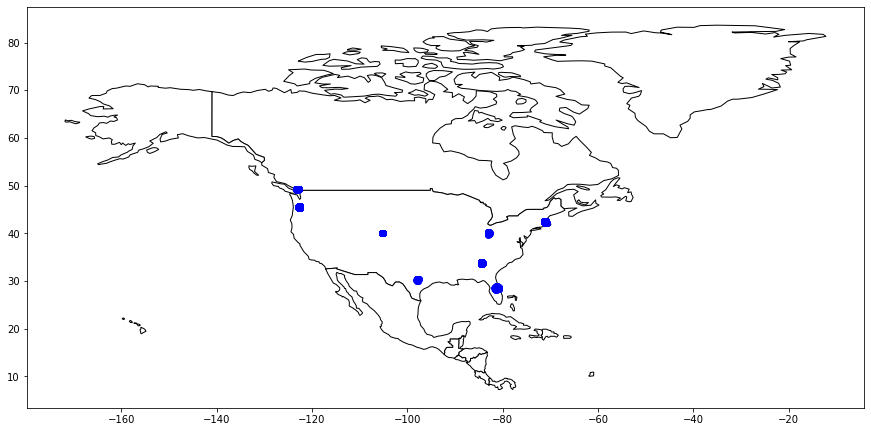

In [10]:
#plotting location of coffee places
gdf = geopandas.GeoDataFrame(
    coffee_bus, geometry=geopandas.points_from_xy(coffee_bus.longitude, coffee_bus.latitude))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='blue')
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

In [13]:
#extracting reviews for coffee shops from all yelp reviews
coffee_rev=pd.DataFrame()
for chunk in data:
    temp=pd.merge(chunk, coffee_bus, on = 'business_id')
    coffee_rev=pd.concat([coffee_rev,temp])

In [10]:
#saving the coffee reviews
coffee_rev.to_csv('coffee_reviews.csv',index=False , encoding='utf-8')

In [11]:
coffee_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124017 entries, 0 to 425
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   review_id     124017 non-null  object        
 1   user_id       124017 non-null  object        
 2   business_id   124017 non-null  object        
 3   stars_x       124017 non-null  int64         
 4   useful        124017 non-null  int64         
 5   funny         124017 non-null  int64         
 6   cool          124017 non-null  int64         
 7   text          124017 non-null  object        
 8   date          124017 non-null  datetime64[ns]
 9   name          124017 non-null  object        
 10  address       124017 non-null  object        
 11  city          124017 non-null  object        
 12  state         124017 non-null  object        
 13  postal_code   124017 non-null  object        
 14  latitude      124017 non-null  float64       
 15  longitude     124017

In [16]:
coffee_rev.sample()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours,geometry
1574,3FTUeDmq4WgXeS_fRrfo5w,KSQkrqatjPfbnPVq2VU24Q,xxD0f8KGp6fIIBzT_3Kcfg,5,1,0,0,Best coffee in the Portland area by far! Have ...,2018-05-02 03:35:09,Black Rock Coffee Bar,...,97224,45.409241,-122.793788,4.0,48,1,"{'OutdoorSeating': 'False', 'BikeParking': 'Tr...","Coffee & Tea, Food","{'Monday': '5:0-21:0', 'Tuesday': '5:0-21:0', ...",POINT (-122.79379 45.40924)


In [42]:
with pd.option_context('display.max_colwidth', 1000):
    print(coffee_rev.sample().text)

1085    Much better than Starbucks. I enjoy the atmosphere. There wifi could be improved. It always goes slow and has issues which has kept me from coming in for work. I also like silver canyon brews better for take home coffee.
Name: text, dtype: object
